In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error 

from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV #search for the optimal c and gamma values 



from sklearn.model_selection import train_test_split


from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve   #expand on this in the write up 


In [2]:
dataset=pd.read_csv('telemonitoring_parkinsons_updrs.data.csv')

<AxesSubplot:>

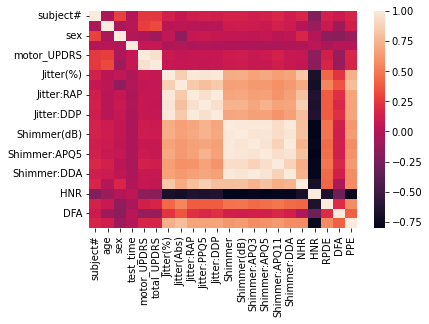

In [3]:
sns.heatmap(dataset.corr( ), annot=False)

In [4]:
from sklearn.model_selection import train_test_split 


In [5]:
print(dataset.columns[18])
# dataset = dataset.drop(dataset.columns[18], axis=1)
# dataset = dataset.drop(dataset.columns[4], axis=1)

HNR


<AxesSubplot:>

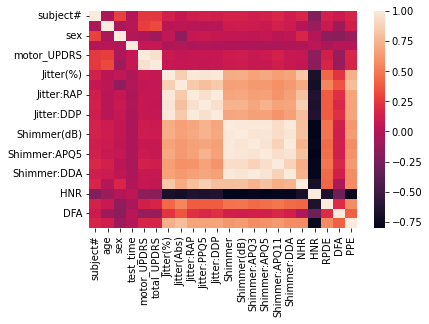

In [6]:
sns.heatmap(dataset.corr( ), annot=False)

In [7]:
y=dataset['total_UPDRS']
X=dataset.loc[:,dataset.columns!="total_UPDRS"]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [9]:
svr = SVR(kernel='linear',gamma=0.09, C=1.5)

In [10]:
svr.fit(x_train,y_train)

SVR(C=1.5, gamma=0.09, kernel='linear')

In [11]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(x_train)
# x_train = sc.transform(x_train)
# x_test = sc.transform(x_test)

In [12]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_MLR_train = svr.predict(x_train)
y_pred_MLR_test = svr.predict(x_test)

accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

Training Accuracy for Multiple Linear Regression Model:  0.9063644476149458
Testing Accuracy for Multiple Linear Regression Model:  0.8999565118728131
RMSE for Training Data:  3.284751845401253
RMSE for Testing Data:  3.3393505404383066


In [13]:
true_val = y_train
pred_val = y_pred_MLR_train

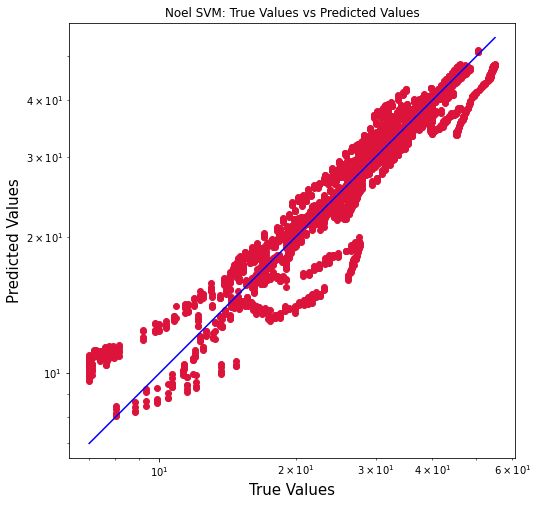

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Noel SVM: True Values vs Predicted Values")
plt.axis('equal')
plt.show()